# These Visualisations explain Linear Regression better:
- Visual of a line fitting to a 2d plane on 1d input and 1d output
- Evolution of parameters (m and c) from a random initial value to a final value
- Decreasing Loss with every increasing iteration
- How we are approaching global minima using gradient descent in a convex function

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display, clear_output
import time

# Set random seed for reproducibility
np.random.seed(42)

In [35]:
# Generate synthetic data
def generate_data(n_samples=30, noise=10):
    """Generate synthetic data with noise"""
    X = np.linspace(0, 10, n_samples).reshape(-1, 1)
    true_m, true_c = 2.5, 7.0  # True parameters
    Y = true_m * X + true_c + noise * np.random.randn(n_samples, 1)
    return X, Y, true_m, true_c

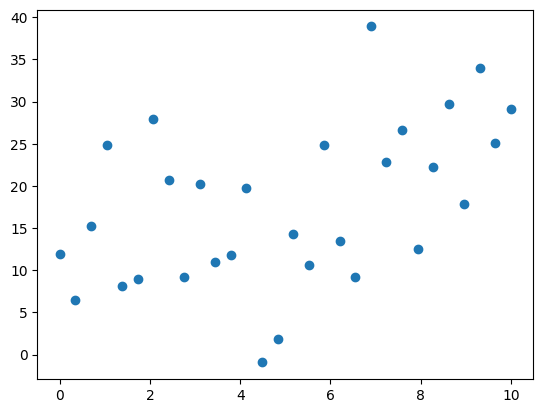

In [36]:
X, Y, m, c = generate_data()
import matplotlib.pyplot as plt
plt.scatter(X, Y)

In [37]:
X.shape

(30, 1)

In [38]:
# Mean Squared Error loss function
def compute_loss(X, Y, m, c):
    """Compute Mean Squared Error loss"""
    n_samples = X.shape[0]
    predictions = m * X + c  # Our linear model: y = mx + c
    loss = np.sum((Y - predictions) ** 2)
    return loss

In [39]:
# Compute gradients for gradient descent
def compute_gradients(X, Y, m, c):
    """Compute gradients for m and c parameters"""
    n_samples = X.shape[0]
    predictions = m * X + c

    # Partial derivatives
    dm = -2*np.sum(X * (Y - predictions))
    dc = -2*np.sum(Y - predictions)

    return dm, dc

In [40]:
# Gradient descent function that stores history for visualization
def gradient_descent(X, Y, learning_rate=0.01, iterations=100):
    """Perform gradient descent and record progress"""
    # Initialize parameters
    m = 0
    c = 0

    # Initialize history for visualization
    m_history = [m]
    c_history = [c]
    loss_history = [compute_loss(X, Y, m, c)]

    # Gradient descent iterations
    for i in range(iterations):
        # Compute gradients
        dm, dc = compute_gradients(X, Y, m, c)

        # Update parameters using gradient descent
        m = m - learning_rate * dm
        c = c - learning_rate * dc

        # Store history
        m_history.append(m)
        c_history.append(c)
        loss_history.append(compute_loss(X, Y, m, c))

    return m, c, m_history, c_history, loss_history

In [66]:
# Generate our data
X, Y, true_m, true_c = generate_data(n_samples=30, noise=5)

# Run gradient descnt
learning_rate = 0.0001
iterations = 10000
final_m, final_c, m_history, c_history, loss_history = gradient_descent(X, Y, learning_rate, iterations)

In [67]:
# Now let's create visualizations to help understand what's happening

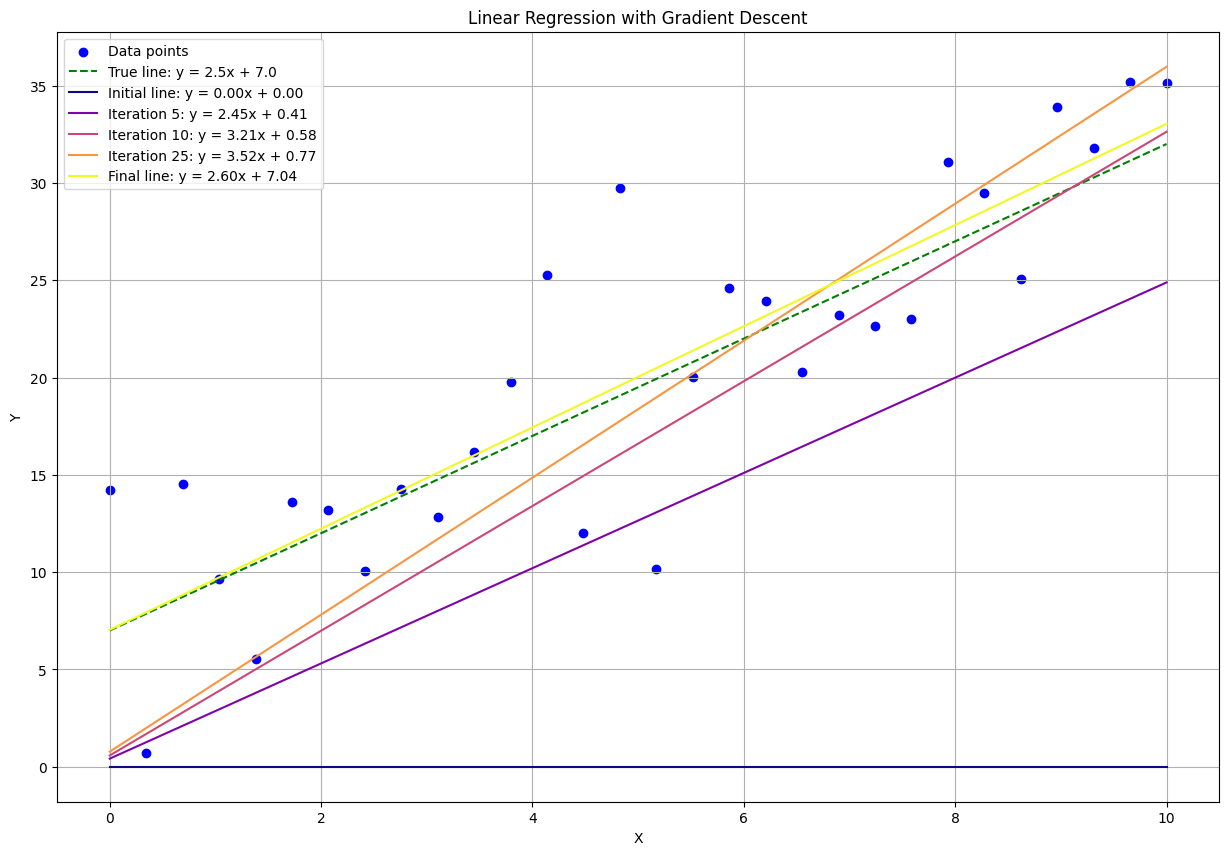

In [68]:
# 1. Plot the data points and the evolution of the regression line
plt.figure(figsize=(15, 10))

# Plot the data points
plt.scatter(X, Y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with Gradient Descent')

# Plot the true line
X_line = np.array([0, 10]).reshape(-1, 1)
Y_line = true_m * X_line + true_c
plt.plot(X_line, Y_line, color='green', linestyle='--', label=f'True line: y = {true_m}x + {true_c}')

# Plot initial, intermediate, and final lines
colors = plt.cm.plasma(np.linspace(0, 1, 5))
iterations_to_plot = [0, 5, 10, 25, iterations-1]

for i, iteration in enumerate(iterations_to_plot):
    if iteration < len(m_history):
        Y_pred = m_history[iteration] * X_line + c_history[iteration]
        label = 'Initial line' if iteration == 0 else 'Final line' if iteration == iterations-1 else f'Iteration {iteration}'
        plt.plot(X_line, Y_pred, color=colors[i], label=f'{label}: y = {m_history[iteration]:.2f}x + {c_history[iteration]:.2f}')

plt.legend()
plt.grid(True)